<div >
<img src = "figs/ans_banner_1920x200.png" />
</div>

# Caso-taller:  SVD en reconocimiento facial

En este caso-taller vamos a aplicar SVD para hacer reconocimiento facial. Esta aplicación se conoce como caras propias, o eigenfaces en inglés, y si bien es una forma rudimentaria de reconocimiento facial sus resultados pueden ser muy interesantes. El problema de las caras propias fue estudiado por primera vez por Sirovich y Kirby en 1987, ampliado en 1990 y su aplicación al reconocimiento facial automatizado fue presentado por Turk and Pentland en 1991.

En este taller vamos a utilizar la base de datos conocida como Caras Etiquetadas en la Naturaleza, o Labeled Faces in the Wild (LFW). Esta base es provista por la Universidad de Massachusetts Amherst para que la comunidad académica la utilice para la evaluación de modelos predictivos.

La base contiene más de 13.000 imágenes de rostros recopilados de la web y cada cara ha sido etiquetada con el nombre de la persona representada. Un subconjunto de 1.680 de las personas fotografiadas tienen dos o más fotos distintas en el conjunto de datos. 


 
#### Referencias

- G. B. Huang,  M. Ramesh, T. Berg, and E. Learned-Miller. Labeled Faces in the Wild: A Database for Studying Face Recognition in Unconstrained Environments. University of Massachusetts, Amherst, Technical Report 07-49, October, 2007.

- M. Kirby and L. Sirovich. Application of the Karhunen-Loève procedure for the characterization of human faces. IEEE Transactions on Pattern Analysis and Machine Intelligence (PAMI), 12(1):103–108, 1990.

- L. Sirovich and M. Kirby. A low-dimensional procedure for the characterization of human faces. Journal of the Optical Society of America A, 4(3):519–524, 1987

- M. Turk and A. Pentland. Eigenfaces for recognition. Journal of Cognitive Neuroscience, 3(1):71–86, 1991.

## Instrucciones generales

1. Para desarrollar el *cuaderno* primero debe descargarlo.

2. Para responder cada inciso deberá utilizar el espacio debidamente especificado.

3. La actividad será calificada sólo si sube el *cuaderno* de jupyter notebook con extensión `.ipynb` en la actividad designada como "entrega calificada por el personal".

4. El archivo entregado debe poder ser ejecutado localmente por el tutor. Sea cuidadoso con la especificación de la ubicación de los archivos de soporte, guarde la carpeta de datos  en la misma ruta de acceso del cuaderno, por ejemplo: `data`.

## Desarrollo


### 1. Carga de datos 

Los datos pueden ser descargados directamente utilizando la librería `scikit-learn`, para ello cargue la base utilizando la función `fetch_lfw_people`. Esta función verificará si los datos están disponibles. De no estarlo, `scikit-learn` los descargará automáticamente desde el sitio web de la Universidad de Massachusetts. Descargue las imágenes para individuos que tengan al menos 25 imágenes y guárdelos en una carpeta llamada `data` usando esta función.

In [71]:
# Utilice este espacio para escribir el código.

# librerias
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_lfw_people
import os

# Descargar los datos utilizando fetch_lfw_people
lfw_people = fetch_lfw_people(min_faces_per_person=25, resize=0.4)

# Print name faces of the datasets
for name in lfw_people.target_names:
    print(name)

images = lfw_people.images
labels = lfw_people.target
target_names = lfw_people.target_names


# Guardo en el datafolder
for i, (image, label) in enumerate(zip(images, labels)):
    person_name = target_names[label].replace(" ", "_")
    numpy_filename = f"data/{person_name}_{i}.npy"
    np.save(numpy_filename, image)  # Save the image as a numpy array

print("Todas las 25 imagénes guardadas")

Alejandro Toledo
Alvaro Uribe
Andre Agassi
Ariel Sharon
Arnold Schwarzenegger
Bill Clinton
Colin Powell
David Beckham
Donald Rumsfeld
George W Bush
Gerhard Schroeder
Gloria Macapagal Arroyo
Gray Davis
Guillermo Coria
Hans Blix
Hugo Chavez
Jack Straw
Jacques Chirac
Jean Chretien
Jennifer Capriati
John Ashcroft
John Negroponte
Juan Carlos Ferrero
Junichiro Koizumi
Kofi Annan
Laura Bush
Lleyton Hewitt
Luiz Inacio Lula da Silva
Mahmoud Abbas
Megawati Sukarnoputri
Nestor Kirchner
Recep Tayyip Erdogan
Ricardo Lagos
Roh Moo-hyun
Rudolph Giuliani
Serena Williams
Silvio Berlusconi
Tom Daschle
Tom Ridge
Tony Blair
Vicente Fox
Vladimir Putin
Todas las 25 imagénes guardadas


### Procedimiento:

1. Descargo la base de datos de la imágen usando fetch
2. Creo una función que guarde las imagenes como un numpy array considerando el numbre de las personas

### 2.  Análisis preliminar 

Describa los contenidos de la base, tenga en cuenta que debe detallar los elementos, la dimensión de la base, y la dimensión de las imágenes.

<class 'numpy.ndarray'>
Dimensión: 50 x 37


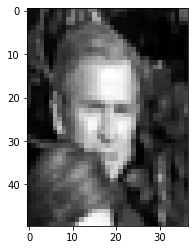

In [72]:
# Verificamos que es un array
print(type(images))

# Intesidad de luz
images[0,:]

# Dimensiones
n,k= image.shape
print("Dimensión:", n, "x", k)

# Vemos la imagen
plt.imshow(image, cmap='gray')
plt.show()

#### Procedimiento:
1. Verificar que es un array para ver que sea un numpy.
2. vemos que cada entrada contiene un número que indica la intensidad de la luz en ese punto:
3. Cargada la imagen y verificado que es un array, verificamos la dimensión
4. graficar con plt.imshow de Matplotlib puede usarse para graficar imágenes

#### Análisis:

#### Conclusión:

A continuación responda las siguientes preguntas: 

- ¿Cuál es la distribución de imágenes por individuos? 

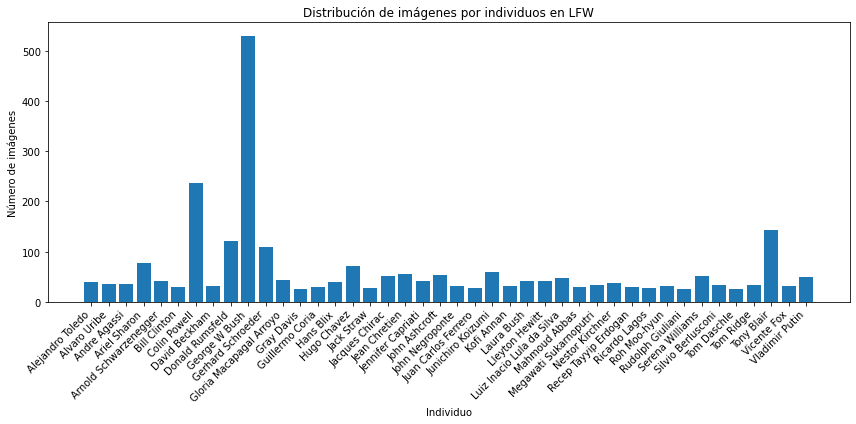

In [73]:
# Utilice este espacio para escribir el código.

# Obtener las etiquetas numéricas de los individuos
target = lfw_people.target

# Contar cuántas imágenes hay para cada individuo
unique_targets, counts = np.unique(target, return_counts=True)

# Obtener los nombres de los individuos a partir de las etiquetas
target_names = lfw_people.target_names

# Crear una gráfica de barras para mostrar la distribución
plt.figure(figsize=(12, 6))
plt.bar(target_names, counts)
plt.xticks(rotation=45, ha="right")
plt.xlabel('Individuo')
plt.ylabel('Número de imágenes')
plt.title('Distribución de imágenes por individuos en LFW')
plt.tight_layout()

plt.show()

##### Procedimiento:
1. Obtener las etiquetas numéricas de los individuos
2. Conteo de imágen por label
3. Extraer los nombres de los individuos por etiquetas
4. Creación de gráfica de barras

#### Análisis y conclusión:

- Las personas con más imagenes son George W Bush, Colin Powell, Donald Rumsfeld, Tony Blair.

- ¿Cuántas imágenes pertenecen a Serena Williams? Grafíquelas 

Imagenes que pertenecen a Serena Williams: 52


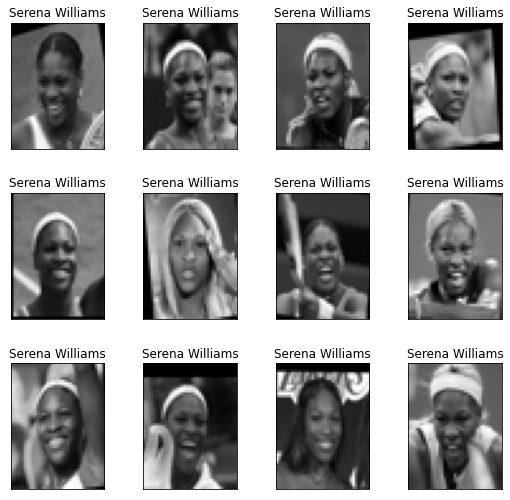

In [74]:
# Utilice este espacio para escribir el código.

# Definición de la galería de imágenes
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

# Buscamos en el target_names todas las serena williams posibles
serena_williams_index = list(lfw_people.target_names).index('Serena Williams')

# Extraemos las imagenes con sus labels
serena_images = lfw_people.images[lfw_people.target == serena_williams_index]

# Now you have the images of Serena Williams in the `serena_images` variable
print(f"Imagenes que pertenecen a Serena Williams: {serena_images.shape[0]}")

# Grafico las imagenes
serena_titles = ["Serena Williams"] * len(serena_images)
plot_gallery(serena_images, serena_titles, h=50, w=37)
plt.show()


(Utilice este espacio para describir el procedimiento, análisis y conclusiones).

### 3.  Reconociendo rostros: las eigenfaces

Las eigenfaces son un conjunto de eigenvectors utilizados en el campo de la visión por computadora, principalmente en el reconocimiento de rostros. Son el resultado de reducir la dimensión de un gran conjunto de imágenes faciales, manteniendo la información que es más relevante para diferenciar las caras.

En este apartado buscaremos encontrar el espacio de menor dimensión manteniendo la información que es más relevante para diferenciar las caras. Lo haremos en etapas:


#### 3.1. Rostro promedio. 

Encuentre primero el "rostro promedio" y grafíquelo.  Para encontrar este rostro, necesita calcular el valor promedio de los pixeles. (*Tip: Si X es la matriz donde las filas representan las imágenes  y en las columnas el tono de gris de los píxeles, debería calcular el promedio para cada una de las columnas*).
 

C:\Users\Felipe\AppData\Local\Temp\ipykernel_18832\2629235407.py:24: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Xmean = df.drop(columns=[ 'label']).mean(axis=0)
C:\Users\Felipe\AppData\Local\Temp\ipykernel_18832\2629235407.py:31: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  person_average = person_images.mean(axis=0).to_numpy()
C:\Users\Felipe\AppData\Local\Temp\ipykernel_18832\2629235407.py:31: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  person_average = person_images.mean(axis=

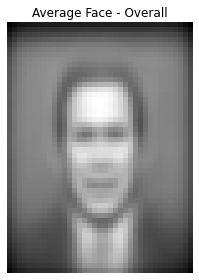

In [76]:
# Utilice este espacio para escribir el código.
import pandas as pd
# Número de muestras 
n_samples, h, w = lfw_people.images.shape

images = lfw_people.images
labels = lfw_people.target
target_names = lfw_people.target_names

#Aplasto los datos para poder trabajar "mas intuitivamente" con las matrices
X = lfw_people.data
X = pd.DataFrame(X)

y = lfw_people.target
y = pd.DataFrame(y, columns=['label']) 

df = y.join(X)

# Mapear los índices de target_names a los valores de etiqueta en el DataFrame
y['name'] = y['label'].apply(lambda x: target_names[x])
df = y.join(X)

# Se cálcula el promedio.
Xmean = df.drop(columns=[ 'label']).mean(axis=0)

# Calcular el promedio por persona -- Por ejercicio Mental
average_faces_per_person = {}
for person_label in df['label'].unique():
    person_name = target_names[person_label]
    person_images = df[df['label'] == person_label].drop(columns=['label'])
    person_average = person_images.mean(axis=0).to_numpy()
    average_faces_per_person[person_name] = person_average

plt.figure(figsize=(4, 4))
plt.imshow(Xmean.values.reshape((h, w)), cmap='gray')
plt.title("Average Face - Overall")
plt.axis('off')
plt.tight_layout()
plt.show()



(Utilice este espacio para describir el procedimiento, análisis y conclusiones).

#### 3.2. Reste el rostro promedio.

A cada una de las imágenes, reste el rostro promedio, es decir, reste la media a cada columna. Grafique las imágenes de Serena Williams luego de quitarle el rostro promedio.

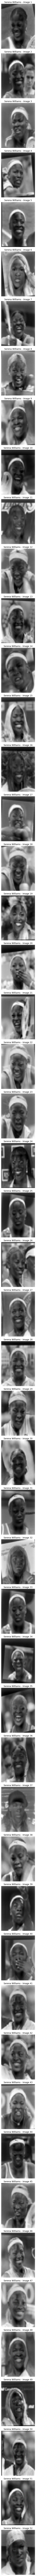

In [77]:
# Utilice este espacio para escribir el código.

# Quitar el "rostro promedio" a las imágenes
demean = df.drop(columns=['label', 'name']) - Xmean

# Agregar de nuevo las columnas 'label' y 'name'
demean['label'] = df['label']
demean['name'] = df['name']

# Asegurar que las columnas 'label' y 'name' estén en su posición original
demean = demean[['label', 'name'] + [col for col in demean.columns if col not in ['label', 'name']]]

# Obtener las imágenes de Serena Williams del DataFrame demean
serena_demean_images = demean[demean['name'] == 'Serena Williams'].drop(columns=['label', 'name'])

# Obtener el número de imágenes de Serena Williams
num_images = serena_demean_images.shape[0]

# Crear una figura para mostrar las imágenes de Serena Williams
fig, axs = plt.subplots(num_images, 1, figsize=(3, 4*num_images))

# Graficar las imágenes de Serena Williams
for i, (_, serena_demean_image) in enumerate(serena_demean_images.iterrows()):
    axs[i].imshow(serena_demean_image.to_numpy().reshape((h, w)), cmap='gray')
    axs[i].set_title(f"Serena Williams - Image {i+1}")
    axs[i].axis('off')

plt.tight_layout()
plt.show()

(Utilice este espacio para describir el procedimiento, análisis y conclusiones).

#### 3.3. Descomposición en Valores Singulares 

Aplique la Descomposición en Valores Singulares a estas nuevas imágenes y retenga solo $K=1000$ valores singulares? ¿Qué proporción de la varianza representan estos valores singulares?

In [78]:
# Utilice este espacio para escribir el código.
from scipy.linalg import svd #pueden explorar con sklearn
U,S,Vt = svd(X)

# Retener solo los primeros 1000 valores singulares
K = 1000
U_k = U[:, :K]
S_k = np.diag(S[:K])
Vt_k = Vt[:K, :]

# Calcular la proporción de varianza representada por los primeros 1000 valores singulares
total_variance = np.sum(S**2)
k_variance = np.sum(S_k**2)
variance_ratio = k_variance / total_variance

print(f"Proporción de varianza representada por los primeros 1000 valores singulares: {variance_ratio:.4f}")

Proporción de varianza representada por los primeros 1000 valores singulares: 0.9995


In [59]:
n,k=X .shape

S2= np.resize(S,[n,1])*np.eye(n,k) #ponemos los valores singulares en una matriz diagonal

l = 1000

reconstructed=np.dot(U[:,0:l],np.dot(S2[0:l,0:l],Vt[0:l,:]))
reconstructed = pd.DataFrame(reconstructed)
reconstructed

,0,1,2,3,4,5,6,7,8,9,...,1840,1841,1842,1843,1844,1845,1846,1847,1848,1849
0,0.100621,0.097972,0.081177,0.086787,0.075266,0.077284,0.057701,0.060359,0.086223,0.070368,...,0.226907,0.232233,0.227949,0.195858,0.216393,0.169007,0.168481,0.146284,0.157940,0.152810
1,0.026453,0.025288,0.028866,0.034851,0.033875,0.034376,0.055322,0.054241,0.040961,0.039756,...,0.117886,0.080470,0.102184,0.139664,0.086074,0.099785,0.079124,0.085090,0.079728,0.015751
2,0.002915,-0.003144,-0.005317,-0.008653,0.009021,0.005555,-0.022631,0.001582,0.021139,-0.006022,...,0.111840,0.088075,0.076274,0.075785,0.084193,0.099662,0.088055,0.087088,0.117852,0.079138
3,-0.005785,0.009877,-0.005402,0.001221,0.010534,-0.001902,0.000216,-0.018491,0.003823,0.007125,...,0.367919,0.712272,0.262770,0.132194,0.162267,0.150528,0.164051,0.149941,0.147797,0.064669
4,0.048903,0.045346,0.071195,0.044328,0.027357,0.022851,0.040623,0.036453,0.007703,0.010188,...,0.046697,0.067477,0.090216,0.083539,0.023143,0.033646,0.058680,0.045417,0.024260,0.032795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2583,0.009801,-0.008769,0.013061,-0.007360,-0.005062,0.002954,0.004667,0.001188,-0.004376,-0.005164,...,0.406825,0.438127,0.087717,0.043296,0.032975,-0.004388,0.011358,-0.003064,-0.007160,-0.008895
2584,0.521211,0.698534,0.670294,0.629675,0.613986,0.627725,0.633649,0.580071,0.544102,0.481910,...,0.171985,0.153391,0.137828,0.155418,0.153527,0.168987,0.176480,0.174955,0.178457,0.172791
2585,0.137812,0.341268,0.373793,0.356671,0.384381,0.365542,0.298657,0.262040,0.279724,0.261540,...,0.111460,0.102628,0.107889,0.097547,0.061752,0.035612,0.036472,0.062323,0.044170,0.008730
2586,0.050826,0.110995,0.093715,0.051156,0.030982,0.084101,0.101066,0.255506,0.262207,0.250397,...,0.746692,0.745801,0.746918,0.759850,0.751704,0.761014,0.761667,0.742452,0.760384,0.238642


(Utilice este espacio para describir el procedimiento, análisis y conclusiones).

#### 3.4. Representando los rostros en las bases

Las eigenfaces nos dice que cada rostro puede ser representado a partir de la aproximación a la matriz original por la matriz de dimensión reducida (determinada en el punto anterior), más el rostro promedio. Muestre que esto es posible para las imágenes de Serena Williams. Compare las imágenes reconstruidas con las originales.

In [79]:
# Utilice este espacio para escribir el código.
# Número de valores singulares
l = 1000

# Obtener los primeros l componentes principales y valores singulares
U_l = U[:, :l]
S_l = np.diag(S[:l])
Vt_l = Vt[:l, :]

# Obtener las imágenes de Serena Williams
serena_images = df[df['name'] == 'Serena Williams'].drop(columns=['label', 'name'])

# Convertir las imágenes de Serena Williams a una matriz
serena_images_matrix = serena_images.to_numpy()

# Aplicar la reconstrucción utilizando los componentes principales y el rostro promedio
reconstructed_images = np.dot(U_l, np.dot(S_l, Vt_l)) + Xmean.to_numpy()

# Crear un DataFrame con todas las imágenes reconstruidas
reconstructed_df = pd.DataFrame(reconstructed_images, columns=df.drop(['label', 'name'], axis=1).columns)

# Agregar las columnas 'label' y 'name' al DataFrame reconstruido
reconstructed_df['label'] = df['label']
reconstructed_df['name'] = df['name']

# Crear un DataFrame con las imágenes reconstruidas de Serena Williams
reconstructed_serena_df = reconstructed_df[reconstructed_df['name'] == 'Serena Williams'].copy()
reconstructed_serena_df=reconstructed_serena_df.drop(['label', 'name'], axis=1)


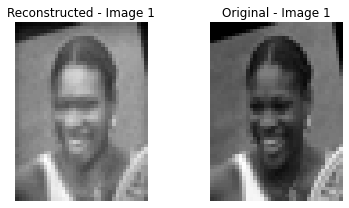

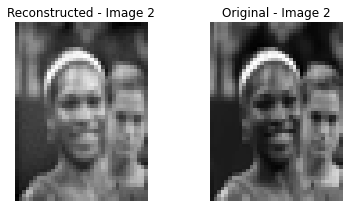

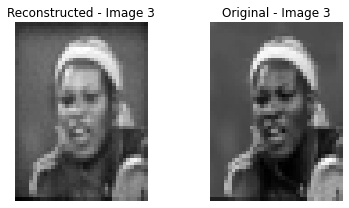

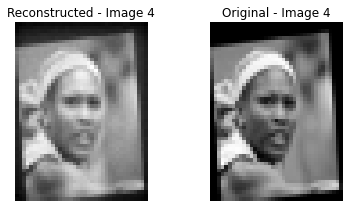

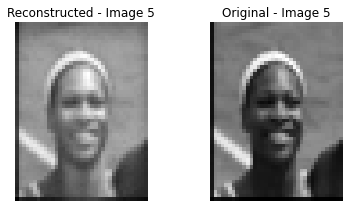

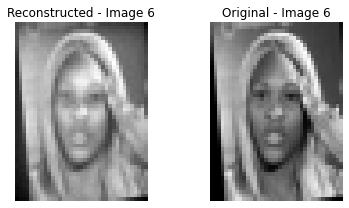

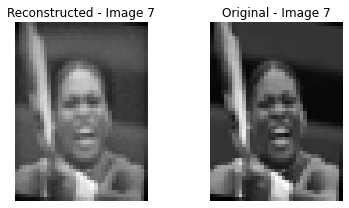

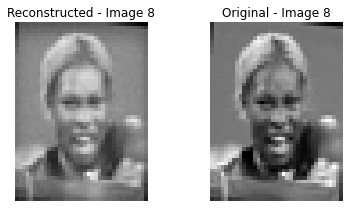

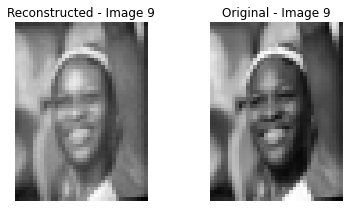

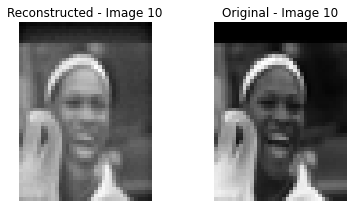

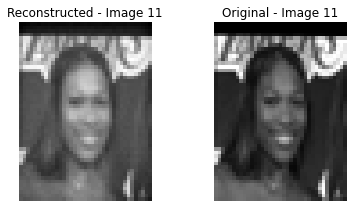

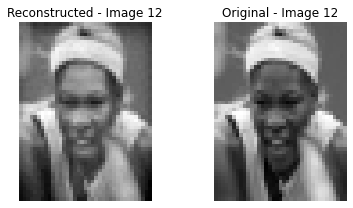

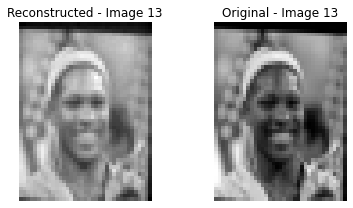

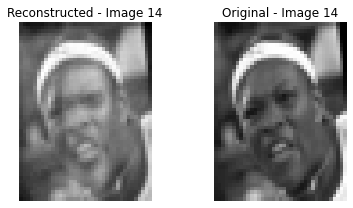

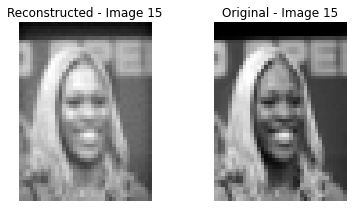

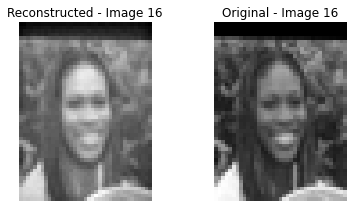

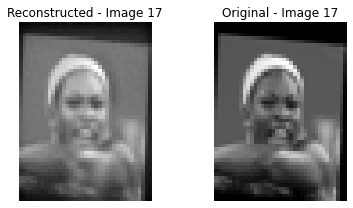

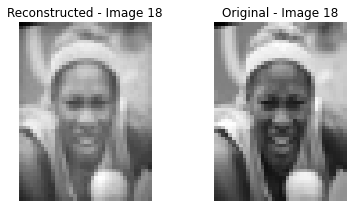

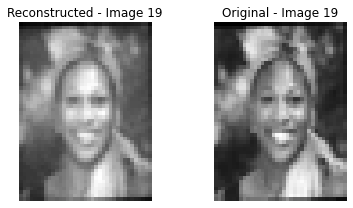

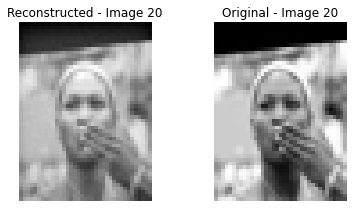

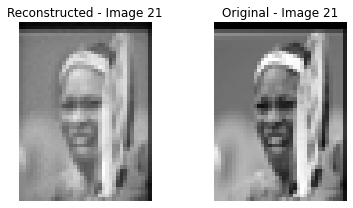

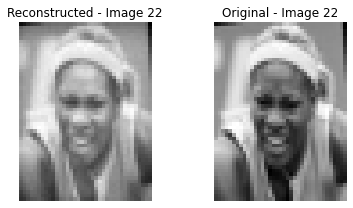

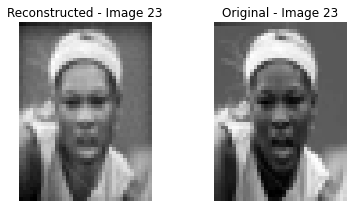

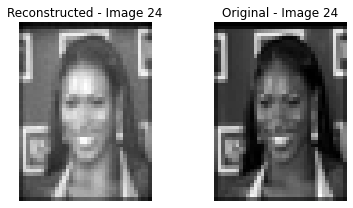

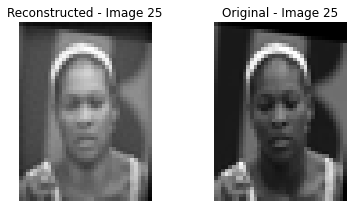

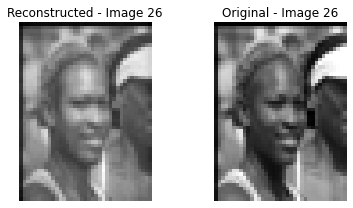

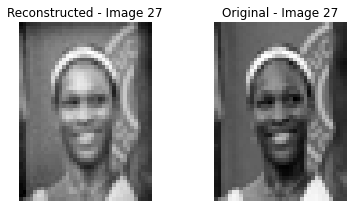

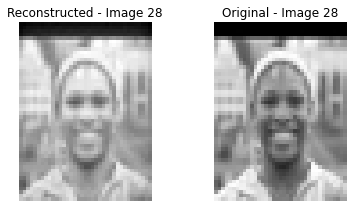

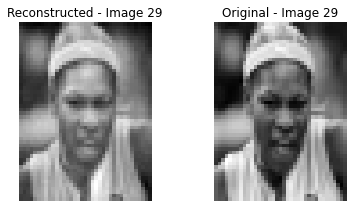

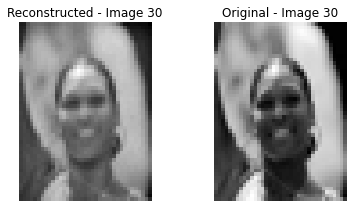

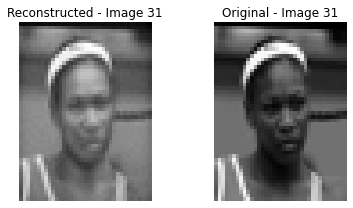

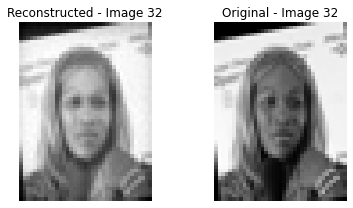

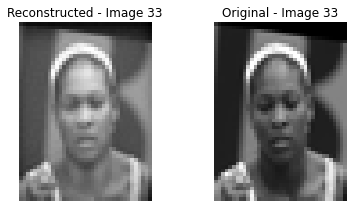

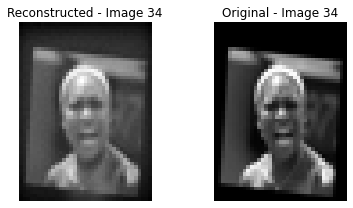

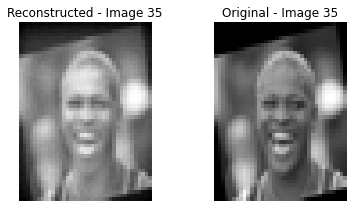

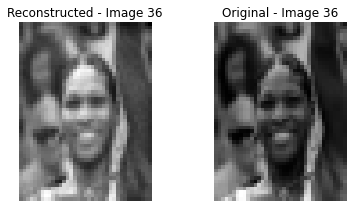

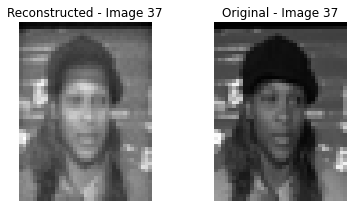

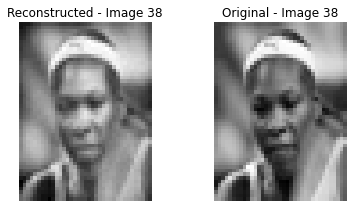

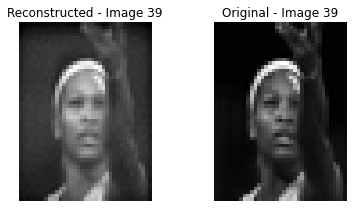

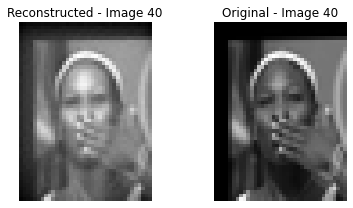

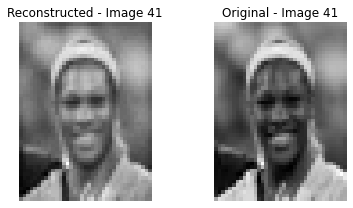

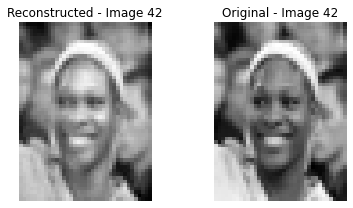

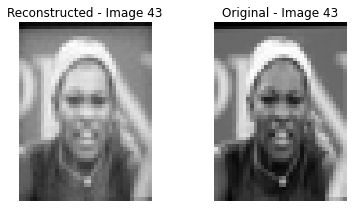

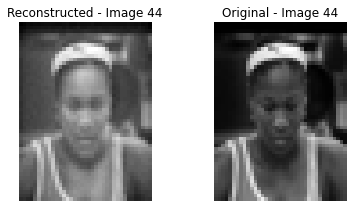

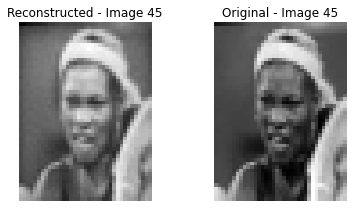

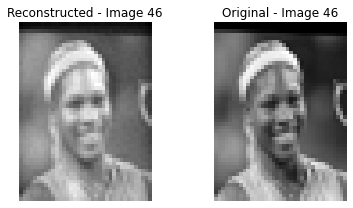

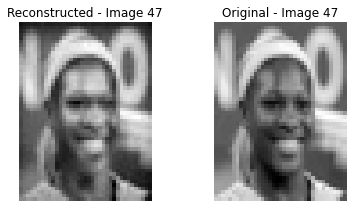

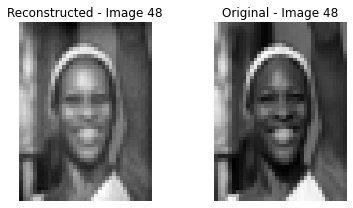

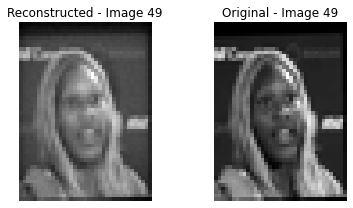

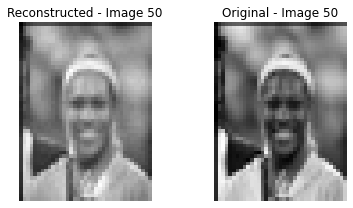

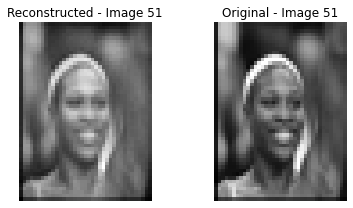

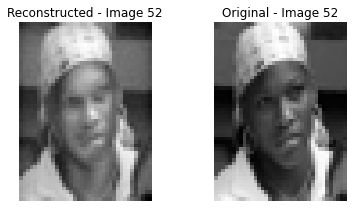

In [80]:
# Mostrar las imágenes originales y reconstruidas de Serena Williams

# Obtener el número de imágenes de Serena Williams
num_images = reconstructed_serena_df.shape[0]

# Iterar a través de las imágenes y graficarlas
for i in range(num_images):
    reconstructed_image = reconstructed_serena_df.iloc[i, :].to_numpy().reshape((h, w))
    original_image = serena_images.iloc[i, :].to_numpy().reshape((h, w))
    
    plt.figure(figsize=(6, 3))
    
    plt.subplot(1, 2, 1)
    plt.imshow(reconstructed_image, cmap='gray')
    plt.title(f'Reconstructed - Image {i+1}')
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(original_image, cmap='gray')
    plt.title(f'Original - Image {i+1}')
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()

(Utilice este espacio para describir el procedimiento, análisis y conclusiones).

### 4. Uniendo Aprendizaje No Supervisado y Supervisado

Dado que cada rostro puede ser representado por las eigenfaces, y la relación que existe entre componentes principales y la SVD, esto sugiere que los componentes principales aquí determinados pueden servir de insumo para un algoritmo de clasificación de aprendizaje supervisado. En este sección del taller haremos esto.

Para ello construiremos un modelo de clasificación logístico para predecir si la imagen pertenece a `George W Bush`  (el individuo con más imágenes en la base)  o no.

#### 4.1. Identificando a `George W Bush`

Cree una variable binaria que tome el valor 1 si la imagen pertenece a `George W Bush` y 0 en caso contrario.

In [81]:
# Utilice este espacio para escribir el código.
# Crear la variable binaria
df['Es_George_Bush'] = (df['name'] == 'George W Bush').astype(int)

# Mostrar las primeras filas del DataFrame con la nueva variable
df.head()

,label,name,0,1,2,3,4,5,6,7,...,1841,1842,1843,1844,1845,1846,1847,1848,1849,Es_George_Bush
0,10,Gerhard Schroeder,0.092810,0.090196,0.086275,0.082353,0.078431,0.075817,0.071895,0.067974,...,0.236601,0.228758,0.197386,0.213072,0.164706,0.171242,0.132026,0.173856,0.134641,0
1,9,George W Bush,0.030065,0.030065,0.030065,0.028758,0.032680,0.041830,0.045752,0.045752,...,0.092810,0.100654,0.145098,0.087582,0.096732,0.079739,0.082353,0.086275,0.015686,1
2,41,Vladimir Putin,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001307,...,0.086275,0.079739,0.070588,0.094118,0.098039,0.100654,0.098039,0.099346,0.079739,0
3,6,Colin Powell,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.779085,0.236601,0.151634,0.151634,0.147712,0.152941,0.154248,0.154248,0.061438,0
4,9,George W Bush,0.044444,0.058824,0.071895,0.044444,0.019608,0.026144,0.028758,0.026144,...,0.070588,0.082353,0.071895,0.035294,0.037908,0.061438,0.043137,0.018301,0.039216,1


Se crea a través de un condicional la columna Es_George_Bush 

#### 4.2. Bases de Entrenamiento y Prueba.

Divida la base utilizada anteriormente en dos: 80% de la base de imágenes asígnelas a la base de entrenamiento y el 20% restante a la de prueba, utilice un `random_state=10101`. 

In [82]:
# Utilice este espacio para escribir el código.
from sklearn.model_selection import train_test_split

# Dividir los datos en bases de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df.drop(['label', 'name', 'Es_George_Bush'], axis=1), df['Es_George_Bush'], test_size=0.2, random_state=10101)

Se crea la separación a través del uso de la librería de SkLearn con los parametros indicados

#### 4.3. Descomposición en Valores Singulares 

Para la base de entrenamiento y de prueba, realice la descomposición en valores singulares (Recuerde recentrar las matrices para que tenga media 0). 

In [83]:
# Utilice este espacio para escribir el código.
from scipy.linalg import svd

# Recentrar las matrices de entrenamiento y prueba
X_train_centered = X_train - X_train.mean()
X_test_centered = X_test - X_test.mean()

# Realizar la descomposición en valores singulares (SVD) en la base de entrenamiento
U_train, S_train, Vt_train = svd(X_train_centered)

# Realizar la descomposición en valores singulares (SVD) en la base de prueba
U_test, S_test, Vt_test = svd(X_test_centered)

(Utilice este espacio para describir el procedimiento, análisis y conclusiones).

#### 4.4. Estimación de modelo de aprendizaje supervisado


Utilizando $k=1000$ valores singulares, construya los 1000 primeros componentes principales y úselos como predictores en su modelo logístico. Utilice como métrica de performance el porcentaje de imágenes de `George W Bush` clasificadas correctamente.

Para estimar su modelo logístico utilice el `solver='sag`,`random_state=10101` y `max_iter=1000`. Como se muestra a continuación:



In [68]:
from sklearn.linear_model import LogisticRegression

Modelo_Logistico = LogisticRegression(solver='sag',random_state=10101,max_iter=1000)

# Utilice este espacio para escribir el código restante.

# Número de componentes principales a utilizar
k = 1000

# Obtener los primeros k componentes principales y valores singulares
U_train_k = U_train[:, 0:k]
Vt_train_k = Vt_train[0:k, :]

U_test_k = U_test[:, 0:k]
Vt_test_k = Vt_test[0:k, :]

n1,k1=X_train.shape
n2,k2=X_test.shape

S2_train_k= np.resize(S_train,[n1,1])*np.eye(n1,k2)
S2_test_k= np.resize(S_test,[n2,1])*np.eye(n2,k2)

S2_train_k = S2_train_k[0:k,0:k]
S2_test_k = S2_test_k[0:k,0:k]

# Reconstruir las matrices con los k componentes principales
X_train_reconstructed = np.dot(U_train_k, np.dot(S2_train_k, Vt_train_k))
X_test_reconstructed = np.dot(U_test_k, np.dot(S2_test_k, Vt_test_k))
# Construir el modelo logístico
Modelo_Logistico = LogisticRegression(solver='sag', random_state=10101, max_iter=1000)

# Entrenar el modelo logístico en la base de entrenamiento reconstruida
Modelo_Logistico.fit(X_train_reconstructed, y_train)

# Predecir las etiquetas en la base de prueba reconstruida
y_pred = Modelo_Logistico.predict(X_test_reconstructed)

# Calcular el porcentaje de imágenes de George W Bush clasificadas correctamente
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Porcentaje de imágenes de George W Bush clasificadas correctamente: {accuracy * 100:.2f}%")

Porcentaje de imágenes de George W Bush clasificadas correctamente: 89.00%


(Utilice este espacio para describir el procedimiento, análisis y conclusiones).

#### 4.5. Mejorando el Ajuste

Trate ahora el número de valores singulares como un hiper-parámetro a encontrar. Emplee validación cruzada con 5 o 10 folds (dependiendo de su poder computacional) para encontrar el número óptimo de valores singulares. Con este modelo, evalúe el porcentaje de imágenes de `George W Bush` clasificadas correctamente en su muestra de prueba. Compare y discuta esta forma de elegir el número de variables con aquella utilizada en  4.4. (Esto puede tomar mucho tiempo y requerir mucha capacidad computacional, puede aprovechar los recursos de [Google Colab](https://colab.research.google.com/))


In [64]:
# Utilice este espacio para escribir el código.
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Definir los valores de k a explorar
k_values = [10, 50, 100, 200, 500, 1000]

S2_train_k= np.resize(S_train,[n1,1])*np.eye(n1,k2)
S2_test_k= np.resize(S_test,[n2,1])*np.eye(n2,k2)

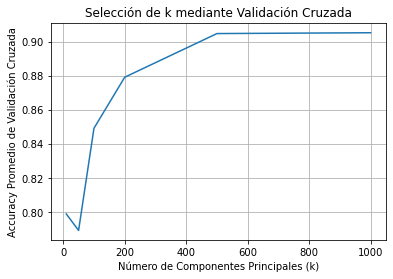

In [66]:
# Realizar búsqueda de hiperparámetros utilizando validación cruzada con GridSearchCV
param_grid = {'C': [1.0], 'solver': ['sag'], 'max_iter': [1000]}
grid_search_results = {}

for k in k_values:
    # Reconstruir las matrices con los k componentes principales
    X_train_reconstructed = np.dot(U_train[:, :k], np.dot(S2_train_k[0:k,0:k], Vt_train[:k, :]))
    X_test_reconstructed = np.dot(U_test[:, :k], np.dot(S2_test_k[0:k,0:k], Vt_test[:k, :]))
    
    # Construir el modelo logístico
    modelo_logistico = LogisticRegression(solver='sag', random_state=10101, max_iter=1000)
    
    # Realizar búsqueda de hiperparámetros
    grid_search = GridSearchCV(estimator=modelo_logistico, param_grid=param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train_reconstructed, y_train)
    
    # Almacenar los resultados en el diccionario
    grid_search_results[k] = grid_search

# Graficar los resultados de la validación cruzada
mean_test_scores = [grid_search_results[k].best_score_ for k in k_values]
plt.plot(k_values, mean_test_scores)
plt.xlabel('Número de Componentes Principales (k)')
plt.ylabel('Accuracy Promedio de Validación Cruzada')
plt.title('Selección de k mediante Validación Cruzada')
plt.grid(True)
plt.show()

# Obtener el mejor valor de k encontrado
best_k = max(grid_search_results, key=lambda k: grid_search_results[k].best_score_)

In [67]:
best_k

1000

(Utilice este espacio para describir el procedimiento, análisis y conclusiones).